In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('processed_data.csv')
data.head(2)

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,brand_model_key
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,Tesla Model 3 Long Range Dual Motor
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,Volkswagen ID.3 Pure


[Correlation Matrix]
> Quantifying the linear association between PriceEuro & other numeric variables 

In [3]:
cont_list = data.select_dtypes(include = [float,int]).columns[1:]
data[cont_list].corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.782324,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.778422,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.750859,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.319678,0.301230,0.396705
FastCharge_KmH,-0.782324,0.778422,0.750859,0.319678,1.000000,0.262732,0.658882
Seats,-0.175335,0.126470,0.300163,0.301230,0.262732,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.658882,0.020920,1.000000


[Inference]
> AccelSec, TopSpeed_KmH, Range_Km, FastCharge_KmH has |correlation| > 0.5, this clearly indicates that 
> there is a strong linear association between them & our response variable {PriceEuro} 

[ScatterPlot : AccelSec Vs PriceEuro]

<AxesSubplot:xlabel='AccelSec', ylabel='PriceEuro'>

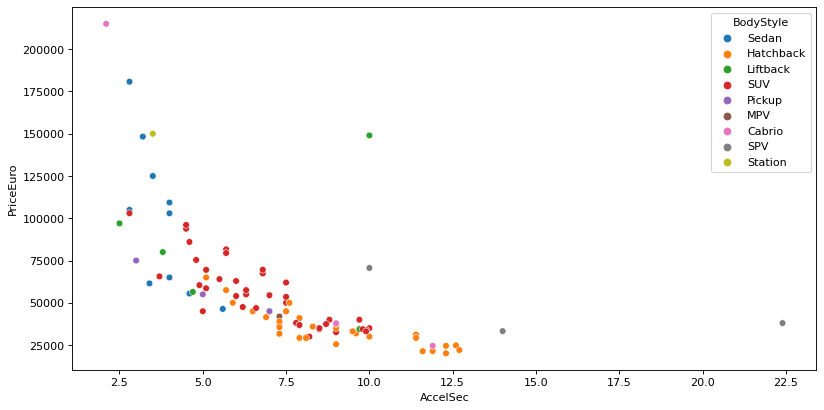

In [4]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

sns.scatterplot(x = 'AccelSec',y = 'PriceEuro', hue = data.BodyStyle, data  = data)

[ScatterPlot : TopSpeed_KmH Vs PriceEuro]

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='PriceEuro'>

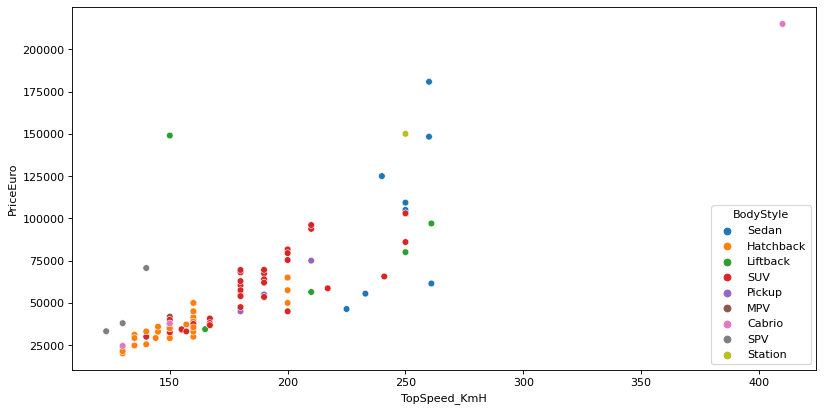

In [5]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

sns.scatterplot(x = 'TopSpeed_KmH',y = 'PriceEuro', hue = data.BodyStyle, data  = data)

[ScatterPlot : Range_Km Vs PriceEuro]

<AxesSubplot:xlabel='Range_Km', ylabel='PriceEuro'>

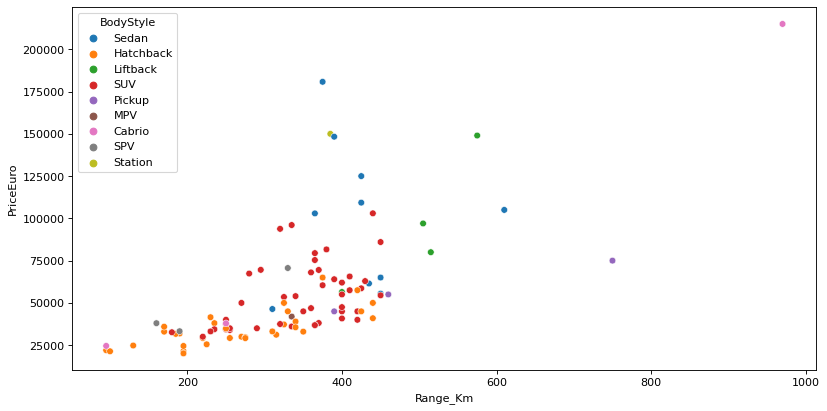

In [6]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

sns.scatterplot(x = 'Range_Km',y = 'PriceEuro', hue = data.BodyStyle, data  = data)

[ScatterPlot : Efficiency_WhKm Vs PriceEuro]

<AxesSubplot:xlabel='Efficiency_WhKm', ylabel='PriceEuro'>

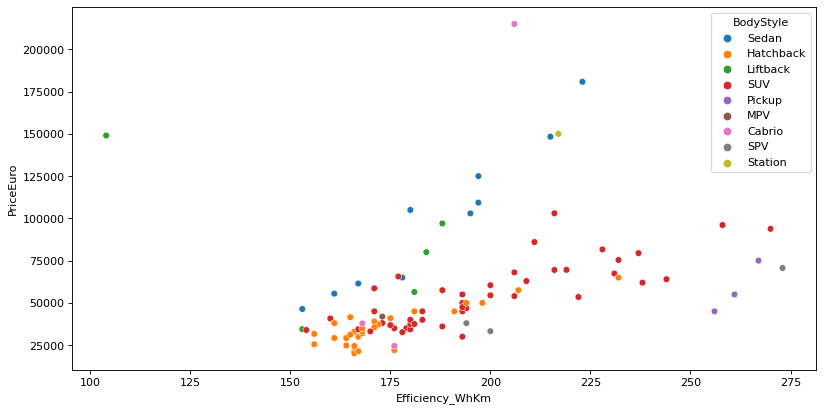

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

sns.scatterplot(x = 'Efficiency_WhKm',y = 'PriceEuro', hue = data.BodyStyle, data  = data)

[ScatterPlot : FastCharge_KmH Vs PriceEuro]

<AxesSubplot:xlabel='FastCharge_KmH', ylabel='PriceEuro'>

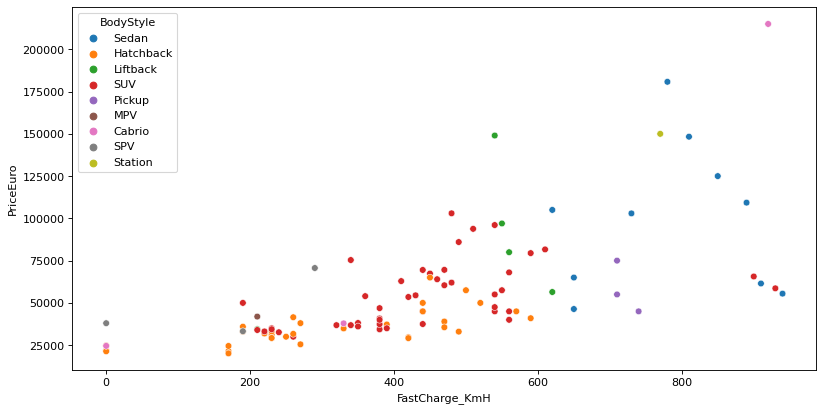

In [8]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

sns.scatterplot(x = 'FastCharge_KmH',y = 'PriceEuro', hue = data.BodyStyle, data  = data)

[DistributionPlot : PriceEuro]

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PriceEuro', ylabel='Density'>

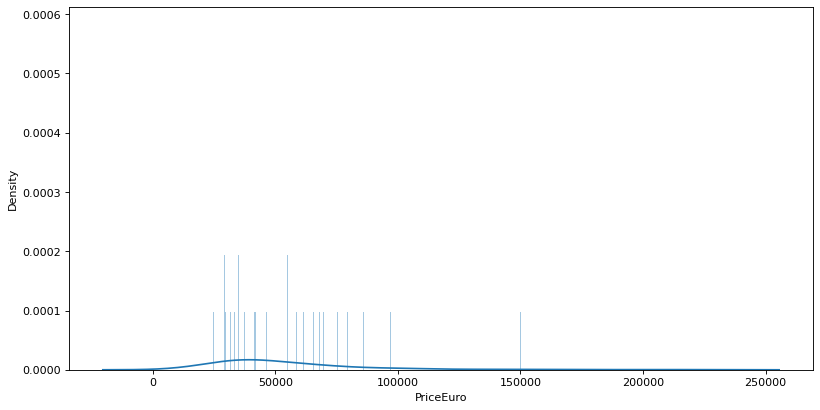

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

bins_ = 100
sns.distplot(data.PriceEuro,bins = int(np.floor((data.PriceEuro.max() - data.PriceEuro.min())/bins_)),hist = True)

[Outlier Analysis : PriceEuro]

<AxesSubplot:xlabel='PriceEuro'>

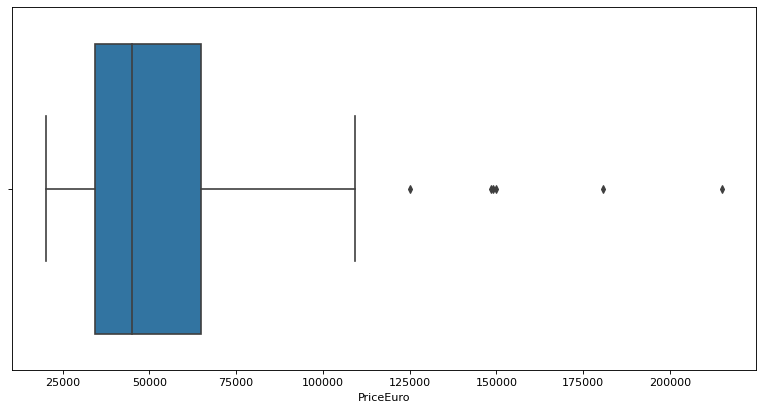

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

sns.boxplot(x = 'PriceEuro', hue = data.BodyStyle, data = data)

[Quantile Data]
> It contains the distribution & the movement of the quantiles for our response variable PriceEuro

In [11]:
price_qd = pd.DataFrame()
qcuts = list(np.arange(0,1,0.01))
for qcut in qcuts:
    datum = pd.DataFrame({'qcut':[qcut],
                          'price_q':[np.quantile(data.PriceEuro,q = qcut)]})
    price_qd = pd.concat([price_qd,datum],axis = 0)
    print(f"augmenting q{qcut}")

augmenting q0.0
augmenting q0.01
augmenting q0.02
augmenting q0.03
augmenting q0.04
augmenting q0.05
augmenting q0.06
augmenting q0.07
augmenting q0.08
augmenting q0.09
augmenting q0.1
augmenting q0.11
augmenting q0.12
augmenting q0.13
augmenting q0.14
augmenting q0.15
augmenting q0.16
augmenting q0.17
augmenting q0.18
augmenting q0.19
augmenting q0.2
augmenting q0.21
augmenting q0.22
augmenting q0.23
augmenting q0.24
augmenting q0.25
augmenting q0.26
augmenting q0.27
augmenting q0.28
augmenting q0.29
augmenting q0.3
augmenting q0.31
augmenting q0.32
augmenting q0.33
augmenting q0.34
augmenting q0.35000000000000003
augmenting q0.36
augmenting q0.37
augmenting q0.38
augmenting q0.39
augmenting q0.4
augmenting q0.41000000000000003
augmenting q0.42
augmenting q0.43
augmenting q0.44
augmenting q0.45
augmenting q0.46
augmenting q0.47000000000000003
augmenting q0.48
augmenting q0.49
augmenting q0.5
augmenting q0.51
augmenting q0.52
augmenting q0.53
augmenting q0.54
augmenting q0.55
augmentin

<AxesSubplot:xlabel='qcut', ylabel='price_q'>

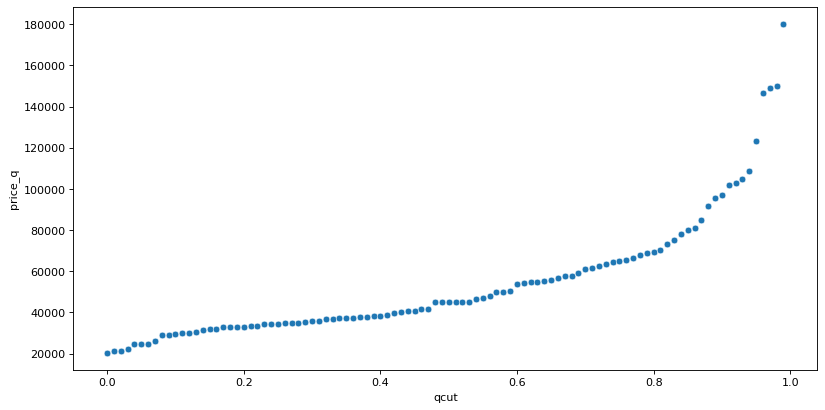

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

sns.scatterplot(x = 'qcut',y ='price_q',data = price_qd)

[Brand - Feature Vs Price Distribution]

In [13]:
data.groupby(['Brand']).agg(models = pd.NamedAgg('Model','count'),
                            avg_Acel = pd.NamedAgg('AccelSec','mean'),
                            avg_topspeed = pd.NamedAgg('TopSpeed_KmH','mean'),
                            avg_range = pd.NamedAgg('Range_Km','mean'),
                            avg_efficiency = pd.NamedAgg('Efficiency_WhKm','mean'),
                            avg_fastcharge = pd.NamedAgg('FastCharge_KmH','mean'),
                            PowerTraintypes = pd.NamedAgg('PowerTrain','nunique'),
                            bodystyles = pd.NamedAgg('BodyStyle','nunique'),
                            segments = pd.NamedAgg('Segment','nunique'),
                            seatings = pd.NamedAgg('Seats','unique'),
                            min_price = pd.NamedAgg('PriceEuro','min'),
                            mean_price = pd.NamedAgg('PriceEuro','mean'),
                            median_price = pd.NamedAgg('PriceEuro','median'),
                            max_price = pd.NamedAgg('PriceEuro','max')).reset_index()

,Brand,models,avg_Acel,avg_topspeed,avg_range,avg_efficiency,avg_fastcharge,PowerTraintypes,bodystyles,segments,seatings,min_price,mean_price,median_price,max_price
0,Aiways,1,9.000000,150.000000,335.000000,188.000000,350.000000,1,1,1,[5],36057,36057.000000,36057.0,36057
1,Audi,9,5.566667,200.000000,356.666667,224.555556,567.777778,1,2,3,"[5, 4]",55000,80593.666667,79445.0,125000
2,BMW,4,6.250000,172.500000,318.750000,177.500000,435.000000,1,3,2,"[5, 4]",38017,53145.750000,53263.0,68040
3,Byton,3,6.833333,190.000000,371.666667,234.666667,453.333333,2,1,1,[5],53500,59833.333333,62000.0,64000
4,CUPRA,1,6.500000,160.000000,425.000000,181.000000,570.000000,1,1,1,[4],45000,45000.000000,45000.0,45000
5,Citroen,1,9.700000,150.000000,250.000000,180.000000,380.000000,1,1,1,[5],40000,40000.000000,40000.0,40000
6,DS,1,8.700000,150.000000,250.000000,180.000000,380.000000,1,1,1,[5],37422,37422.000000,37422.0,37422
7,Fiat,2,9.000000,150.000000,250.000000,168.000000,330.000000,1,2,1,[4],34900,36400.000000,36400.0,37900
8,Ford,4,6.400000,180.000000,395.000000,202.250000,395.000000,2,1,1,[5],46900,54568.750000,54237.5,62900
9,Honda,2,8.900000,145.000000,170.000000,168.000000,190.000000,1,1,1,[4],32997,34459.000000,34459.0,35921
